# Application of Linear Regression and Logistic Regression models of Bee Mating Flight Patterns

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from models.lin_reg import LinearRegression as ScratchLinearRegression
from models.log_reg import LogisticRegression as ScratchLogisticRegression

In [59]:
log_reg_data = pd.read_csv("logRegressionData.csv")
log_reg_data = log_reg_data.loc[log_reg_data.apply(lambda x: 60 < x['flight_duration'] < 23400, axis=1)]
log_X = log_reg_data.iloc[:, 1:-1]
log_y = log_reg_data.iloc[:, -1]

A 60-20-20 split was applied to the data to get the training, validation, and testing data sets.  

In [60]:
# split the data into train and test sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(log_X, log_y, test_size=0.2, random_state=42)

# split the training data into train and validation sets
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_train_log, y_train_log, test_size=0.25, random_state=42)

In [61]:
# apply the Logistic Regression model
logistic_reg = ScratchLogisticRegression()
logistic_reg.train(X_train_log, y_train_log)

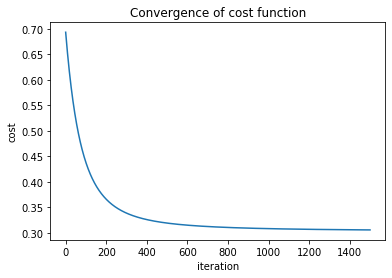

In [62]:
# show plot of convergence of costs when calculating theta
log_costs = logistic_reg.cal_costs()
plt.plot(range(len(log_costs)), log_costs)
plt.title('Convergence of cost function')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [63]:
# check model against the validation set
y_pred_log_val = logistic_reg.predict(X_val_log)
accuracy = logistic_reg.accuracy(y_pred_log_val, y_val_log)
print('Prediction accuracy of validation set: %f' % accuracy)
log_conf_mtx = confusion_matrix(y_val_log, y_pred_log_val)
logreg_f1_score = f1_score(y_val_log, y_pred_log_val, average='weighted')
print('F1 Score of validation set: %f' % logreg_f1_score)
print('Confusion Matrix of validation set:')
print(log_conf_mtx)

Prediction accuracy of validation set: 90.801187
F1 Score of validation set: 0.864235
Confusion Matrix of validation set:
[[  0  31]
 [  0 306]]


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Using resample 

In [110]:
log_train_data = X_train_log
log_train_data['gbd'] = y_train_log
bad_day = log_train_data.loc[log_train_data.apply(lambda x: x['gbd'] == 0, axis=1)]
good_day = log_train_data.loc[log_train_data.apply(lambda x: x['gbd'] == 1, axis=1)]
bad_day_upsample = resample(bad_day, replace=True, n_samples=(int)(len(good_day)*0.62), random_state=42)
log_train_data_upsampled = pd.concat([good_day, bad_day_upsample])
X_train_log_upsample = log_train_data_upsampled.iloc[:, :-1]
y_train_log_upsample = log_train_data_upsampled.iloc[:, -1]

# apply the Logistic Regression model
logistic_reg.train(X_train_log_upsample, y_train_log_upsample)

# check model against the validation set
y_pred_log_val = logistic_reg.predict(X_val_log)
accuracy = logistic_reg.accuracy(y_pred_log_val, y_val_log)
print('Prediction accuracy of validation set: %f' % accuracy)
log_conf_mtx = confusion_matrix(y_val_log, y_pred_log_val)
logreg_f1_score = f1_score(y_val_log, y_pred_log_val, average='weighted')
print('F1 Score of validation set: %f' % logreg_f1_score)
print('Confusion Matrix of validation set:')
print(log_conf_mtx)

Prediction accuracy of validation set: 64.391691
F1 Score of validation set: 0.718970
Confusion Matrix of validation set:
[[ 19  12]
 [108 198]]


In [111]:
# check model against the test set
y_pred_log = logistic_reg.predict(X_test_log)
accuracy = logistic_reg.accuracy(y_pred_log, y_test_log)
print('Prediction accuracy of test set: %f' % accuracy)
log_conf_mtx = confusion_matrix(y_test_log, y_pred_log)
logreg_f1_score = f1_score(y_test_log, y_pred_log, average='weighted')
print('F1 Score of test set: %f' % logreg_f1_score)
print('Confusion Matrix of test set:')
print(log_conf_mtx)
print()

Prediction accuracy of test set: 67.062315
F1 Score of test set: 0.736769
Confusion Matrix of test set:
[[ 21  12]
 [ 99 205]]



While the prediction accuracy score and the F1 score look like good numbers, if we take a look at the confusion matrix, we can see that all bad days were incorrectly predicted as good days. This can be partially attributed to the major class imbalance in the data set. We'll use the ibmlearn's implementation of SMOTE, synthetic minority oversampling technique, to try to fix this imbalance and hopefully get a more useful model. 

In [94]:
sm = SMOTE(sampling_strategy=.60, random_state=42)
X_train_log_sm, y_train_log_sm = sm.fit_sample(X_train_log, y_train_log)

# apply the Logistic Regression model
logistic_reg.train(X_train_log_sm, y_train_log_sm)

# check model against the validation set
y_pred_log_val = logistic_reg.predict(X_val_log)
accuracy = logistic_reg.accuracy(y_pred_log_val, y_val_log)
print('Prediction accuracy of validation set: %f' % accuracy)
log_conf_mtx = confusion_matrix(y_val_log, y_pred_log_val)
logreg_f1_score = f1_score(y_val_log, y_pred_log_val, average='weighted')
print('F1 Score of validation set: %f' % logreg_f1_score)
print('Confusion Matrix of validation set:')
print(log_conf_mtx)

Prediction accuracy of validation set: 63.798220
F1 Score of validation set: 0.714339
Confusion Matrix of validation set:
[[ 19  12]
 [110 196]]


In [95]:
# check model against the test set
y_pred_log = logistic_reg.predict(X_test_log)
accuracy = logistic_reg.accuracy(y_pred_log, y_test_log)
print('Prediction accuracy of test set: %f' % accuracy)
log_conf_mtx = confusion_matrix(y_test_log, y_pred_log)
logreg_f1_score = f1_score(y_test_log, y_pred_log, average='weighted')
print('F1 Score of test set: %f' % logreg_f1_score)
print('Confusion Matrix of test set:')
print(log_conf_mtx)
print()

Prediction accuracy of test set: 66.172107
F1 Score of test set: 0.729749
Confusion Matrix of test set:
[[ 20  13]
 [101 203]]

